# **Proyecto - Gestion y Almacenamiento de Dato**
---
1.   Karen Arcila
2.   Santiago Mejía
3.   Jimmy Piedrahita



### **Descripción del proyecto**

* Limpieza de Datos: Indentificación y manejo de los valores nulos o duplicados en el conjunto de datos. tambien se Realizará correcciones en los datos inconsistentes o erróneos.
* Visualización de Datos: Utilización de Matplotlib y Seaborn para crear gráficos y visualizaciones Exploración de patrones, tendencias y relaciones en los datos.
* Análisis Exploratorio de Datos (EDA): Calculo de  estadísticas descriptivas para comprender mejor la distribución de los datos. Generación de gráficos para explorar la relación entre diferentes variables.

* (No se realizó imputacion de datos)

## CONTEXTO

la base de datos es una en la que se observan todos los equipos adquiridos por la clínica imbanaco desde el año 1994 hasta el 2018 en esta base de datos podemos encontrar

el activo: que hace referencia al el numero de cada elemento

el serial: cada serial que identifica un elemento

estado: dice si el equipo o elemento esta activo, depreciado, retirado o pendiente

costo: cuanto costo el elemento

saldo: si para la compra del equipo se hizo un prestamo cuanto se debe de este

descripcion

descripcion tecnica

fecha en que se adquirio el equipo

razon social proveedor: a que entidad se hizo la compra del equipo

Periodos a depreciar PCGA

Desc. C.Costo


## PROBLEMATICA

Se esta evaluando una base de datos en la que hay equipos que llevan tiempo con un saldo que no ah cubierto la institución lo cual estamos organizando y analizando para que la institución se ponga al corriente en sus deudas con esos equipos


## EDA

In [6]:
# importamos las Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
data = pd.read_excel('MODIFICADA1994.xlsx')

**PROBLEMATICA**
* Se Evalua una base de datos que contiene variedad de equipos medicos y llevan tiempo con un saldo que no ah cubierto la institución

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193045 entries, 0 to 193044
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Activo                     112244 non-null  object 
 1   Serial                     112246 non-null  float64
 2   Unnamed: 2                 193031 non-null  float64
 3   Descripcion                93768 non-null   object 
 4   DESCRIPCION TECNICA        85281 non-null   object 
 5   ESTADO                     86987 non-null   object 
 6   Fecha                      112244 non-null  object 
 7   Costo                      86987 non-null   object 
 8   SALDO                      86987 non-null   object 
 9   C. Costo                   86987 non-null   float64
 10  Desc. C.Costo              86987 non-null   object 
 11  Razon social proveedor     69770 non-null   object 
 12  Periodos a depreciar PCGA  86987 non-null   float64
dtypes: float64(4), object(9)
memo

**Informacion de los 5 primeros datos de la base de datos**

Esto se realiza más para poder evidenciar que tenemos almacenado en cada variable

In [9]:
data.head()

,Activo,Serial,Unnamed: 2,Descripcion,DESCRIPCION TECNICA,ESTADO,Fecha,Costo,SALDO,C. Costo,Desc. C.Costo,Razon social proveedor,Periodos a depreciar PCGA
0,000083359-000,83359.0,83359.0,CARRO CASE 36 EN ACERO METRO,L6S-P CONTRATO LEASING FINANCIERO 180-109913 ...,Activo,2016-06-01 00:00:00,$,"$ 8.091.598,00",70040302.0,ADMINISTRACION CENTRAL ESTERILIZACION,BANCO DE OCCIDENTE,120.0
1,000000067-000,67.0,67.0,MESA DE CENTRO,"CON VIDRIO, TUBO CROMADO",Retirado,1994-04-14 00:00:00,"$ 0,00","$ 0,00",60020301.0,TESORERIA,NaN,1.0
2,000000100-000,100.0,100.0,MOTOBOMBA,NaN,Retirado,1989-01-01 00:00:00,"$ 0,00","$ 0,00",62010103.0,EDIFICIO DE 13 PISOS TA,NaN,120.0
3,000000101-000,101.0,101.0,MOTOBOMBA,NaN,Retirado,1989-01-01 00:00:00,"$ 0,00","$ 0,00",62010103.0,EDIFICIO DE 13 PISOS TA,NaN,120.0
4,000000103-000,103.0,103.0,MOTOBOMBA,NaN,Retirado,1989-01-01 00:00:00,"$ 0,00","$ 0,00",62010105.0,EDIFICIO DE 11 PISOS TORRE B,NaN,120.0


### **Limpieza de Datos:**
* Al abordar los valores nulos, duplicados y errores, generamos valor al garantizar que los datos sean confiables y precisos.
Datos limpios facilitan la toma de decisiones informadas y evitan errores costosos.

In [10]:
df=data.copy()

In [11]:
df[df.duplicated(subset='Serial')] #Duplicados solo por serial
# Muestra las filas duplicadas
print("Filas duplicadas por Serial:")
print(df)

Filas duplicadas por Serial:
               Activo   Serial  Unnamed: 2                   Descripcion  \
0       000083359-000  83359.0     83359.0  CARRO CASE 36 EN ACERO METRO   
1       000000067-000     67.0        67.0                MESA DE CENTRO   
2       000000100-000    100.0       100.0                     MOTOBOMBA   
3       000000101-000    101.0       101.0                     MOTOBOMBA   
4       000000103-000    103.0       103.0                     MOTOBOMBA   
...               ...      ...         ...                           ...   
193040            NaN      NaN         0.0                           NaN   
193041            NaN      NaN         0.0                           NaN   
193042            NaN      NaN         0.0                           NaN   
193043            NaN      NaN         0.0                           NaN   
193044            NaN      NaN         0.0                           NaN   

                                      DESCRIPCION TECNICA 

In [12]:
# Eliminación de datos duplicados
df.drop_duplicates(subset=['Serial'], inplace=True)
print("Número total de filas después de eliminar duplicados:", df.shape[0])

Número total de filas después de eliminar duplicados: 108509


In [13]:
len(df)

108509

Al finalizar la eliminacion de los datos duplicados observamos que nos quedan 108.509 filas

In [14]:
#Conteo datos nulos
datos_nulos = df.isnull().sum()
datos_nulos

Activo                           1
Serial                           1
Unnamed: 2                       7
Descripcion                  18190
DESCRIPCION TECNICA          25970
ESTADO                       24927
Fecha                            1
Costo                        24927
SALDO                        24927
C. Costo                     24927
Desc. C.Costo                24927
Razon social proveedor       41513
Periodos a depreciar PCGA    24927
dtype: int64

La descripion tecnica no nos ofrece mucha informacion que nos pueda ser util para el manejo de la base de datos ademas que falta mucha informacion por este motivo se elimina esta columna.

Además nos dimos cuenta que el unamed: 2 es lo mismo que el serial por ende esa columna tambien se elimina y como se observa la razon social del provedor y el periodo tambien seran eliminadas por la cantidad de datos que no nos serviran para el analisis que queremos realizar

In [15]:
#eliminacion de las columnas 
df.drop(columns=['DESCRIPCION TECNICA'], inplace=True)
df.drop(columns=['Unnamed: 2'], inplace=True) #Nos dimos cuenta que es el mismo que el serial
df.drop(columns=['Razon social proveedor', "Periodos a depreciar PCGA"], inplace=True)

En los siguientes codigos veremos en las columnas de SALDO y Costo que tantos valores tienen el valor de 0 para ver que podemos realizar con estos datos

In [16]:
saldo_cero_count = (df['SALDO'] == '$ 0,00').sum()
print("Cantidad de datos en la columna 'SALDO' con valor $0,00:", saldo_cero_count)
len(df)


Cantidad de datos en la columna 'SALDO' con valor $0,00: 65786


108509

* Se observa que un aproximado de la mitad de los datos no tiene saldo

In [17]:
saldo_cero_count = (df['Costo'] == '$ 0,00').sum()
print("Cantidad de datos en la columna 'costo' con valor $0,00:", saldo_cero_count)
len(df)

Cantidad de datos en la columna 'costo' con valor $0,00: 12371


108509

In [20]:
df.dropna(subset=['ESTADO'])
len(df)

108509

Ahora exploraremos la columna de estado de cada elemento que nos brindara informacion de como se encuentran estos

In [21]:
#Contar cuantos retirados hay
retirados=(df['ESTADO']=='Retirado').sum()
retirados

12339

In [22]:
nulos_estado = df['ESTADO'].isnull().sum()
nulos_estado

24927

In [23]:
#eliminamos aquellos que no tienen estado
df = df.dropna(subset=['ESTADO'])
nulos_estado = df['ESTADO'].isnull().sum()
nulos_estado
len(df)

83582

### Veremos que tipos de estado hay y miraremos que saldo tiene cada uno, cabe aclarar que esto sean diferente a 0, para poder ver que saldo debe la clinica 

In [24]:
#cuantos tipos de estado hay
valores_estado = df['ESTADO'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'ESTADO':", valores_estado)


Valores únicos en la columna 'ESTADO': ['Activo' 'Retirado' 'Depreciado' 'Pendiente']


In [25]:
# Vamos a comparar los equipos que estan retirados pero tienen un saldo por pagar
retirados_no_cero = df[(df['ESTADO'] == 'Retirado') & (df['SALDO'] != '$ 0,00')]

# Imprime el resultado
print("Cantidad de datos con estado 'Retirado' y saldo diferente de '$ 0,00':", len(retirados_no_cero))

Cantidad de datos con estado 'Retirado' y saldo diferente de '$ 0,00': 0


In [26]:
# Vamos a comparar los equipos que estan Activo pero tienen un saldo por pagar
Activo_no_cero = df[(df['ESTADO'] == 'Activo') & (df['SALDO'] != '$ 0,00')]

# Imprime el resultado
print("Cantidad de datos con estado 'Activo' y saldo diferente de '$ 0,00':", len(Activo_no_cero))

Cantidad de datos con estado 'Activo' y saldo diferente de '$ 0,00': 17796


In [27]:
# Vamos a comparar los equipos que estan depreciado pero tienen un saldo por pagar
Despreciado_no_cero = df[(df['ESTADO'] == 'Depreciado') & (df['SALDO'] != '$ 0,00')]

# Imprime el resultado
print("Cantidad de datos con estado 'Despreciado' y saldo diferente de '$ 0,00':", len(Despreciado_no_cero))

Cantidad de datos con estado 'Despreciado' y saldo diferente de '$ 0,00': 0


In [28]:
# Vamos a comparar los equipos que estan retirados pero tienen un saldo por pagar
Pendiente_no_cero = df[(df['ESTADO'] == 'Pendiente') & (df['SALDO'] != '$ 0,00')]

# Imprime el resultado
print("Cantidad de datos con estado 'Pendiente' y saldo diferente de '$ 0,00':", len(Pendiente_no_cero))

Cantidad de datos con estado 'Pendiente' y saldo diferente de '$ 0,00': 0


* Al realizar el analisis de los equipos en estado retirado tomamos la decision de eliminarlos del dataframe ya que este no nos estara aportando ninguna información relevante en nuestor analisis


### **Gráfico de Barras de Estados:**
* Representaremos la cantidad de activos en cada estado (activo, retirado, etc.) utilizando un gráfico de barras.
1. Si la mayoría de los activos están en estado “Activo”, es una buena señal.


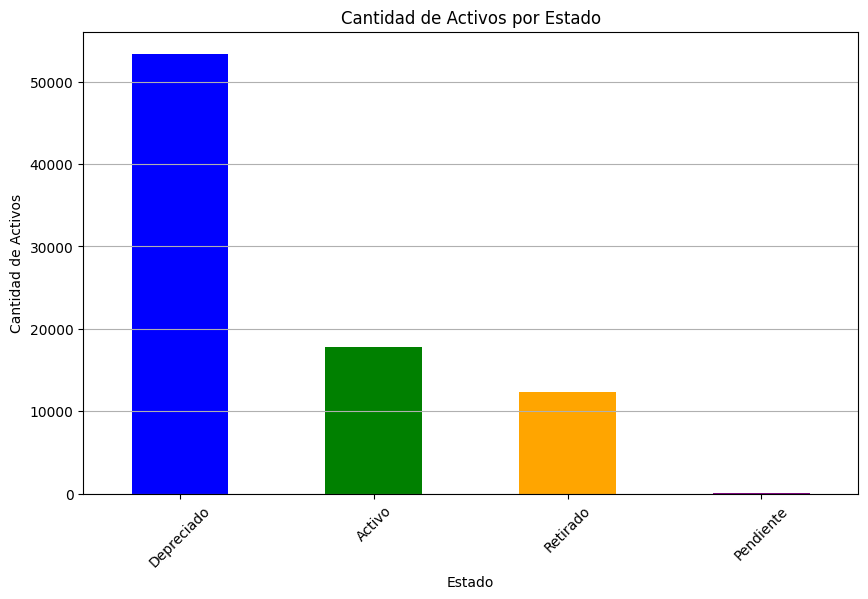

In [29]:
estado_counts = df['ESTADO'].value_counts()

# Crear una lista de colores para cada estado
colores = ['blue', 'green', 'orange', 'purple']

# Crear el gráfico de barras y especificar los colores
plt.figure(figsize=(10, 6))
estado_counts.plot(kind='bar', color=colores)
plt.title('Cantidad de Activos por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Activos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [30]:
#borra aquellos datos que no se pudieron trasnformar en tipo data time los cuales solo son 3
df['Fecha'] = pd.to_datetime(df['Fecha'],errors='coerce')

Al ver que los que todavia cuentan con saldo son los activos vamos a hacer el analisis solo a aquellas filas que sus elementos sigan activos

In [31]:
df1=df[df['ESTADO']=='Activo']
df1

,Activo,Serial,Unnamed: 2,Descripcion,ESTADO,Fecha,Costo,SALDO,C. Costo,Desc. C.Costo,Periodos a depreciar PCGA
0,000083359-000,83359.0,83359.0,CARRO CASE 36 EN ACERO METRO,Activo,2016-06-01,$,"$ 8.091.598,00",70040302.0,ADMINISTRACION CENTRAL ESTERILIZACION,120.0
14256,000081897-000,81897.0,81897.0,LOTE 3A-3B CAPURGANA CONDOMINIO PLAYA,Activo,2014-12-31,"$ 1,00","$ 1,00",66010206.0,CABAÑA CAPURGANA,0.0
14257,000081898-000,81898.0,81898.0,TERRENO APARTAMENTO 306 SAN ANDRES CL 2,Activo,2014-12-31,"$ 1,00","$ 1,00",66010203.0,APARTAMENTO SAN ANDRES 306 BAY POINT,0.0
14258,000081899-000,81899.0,81899.0,TERRENO APARTAMENTO 208 SAN ANDRES CL 2,Activo,2014-12-31,"$ 1,00","$ 1,00",66010201.0,APARTAMENTO SAN ANDRES 208,0.0
14259,000081900-000,81900.0,81900.0,TERRENO APARTAMENTO 410 SAN ANDRES CRA.,Activo,2014-12-31,"$ 1,00","$ 1,00",66010202.0,APARTAMENTO SAN ANDRES 410,0.0
...,...,...,...,...,...,...,...,...,...,...,...
86836,000088859-000,88859.0,88858.0,LICENCIA SOFTWARE VISUALIZACION QP-210VK,Activo,2016-12-23,"$ 983.381,00","$ 836.996,00",70050802.0,COORDINACION OFTALMOLOGIA,96.0
86839,000096953-000,96953.0,36091.0,SILLA NAPPA SCANFORM TELA NEGRA,Activo,2018-02-07,"$ 984.666,00","$ 978.184,00",60010101.0,GERENCIA GENERAL,120.0
86959,000044363-000,44363.0,83013.0,FLEBOEXTRACTOR DE NABATOFF AESCULAP,Activo,2010-03-11,"$ 994.120,00","$ 201.478,59",70040308.0,INSTRUMENTAL,120.0
86960,000044364-000,44364.0,44363.0,FLEBOEXTRACTOR DE NABATOFF AESCULAP,Activo,2010-03-11,"$ 994.120,00","$ 201.478,59",70040308.0,INSTRUMENTAL,120.0


In [32]:
len(df1)

17796

#### CAMBIAR EL DE OBJECT A FLOAT

In [33]:
df1["SALDO"] = df1["SALDO"].str.replace(".", "").str.replace(",", ".")
df1["SALDO"] = df1["SALDO"].str.replace("$", "")
df1["SALDO"] = df1["SALDO"].astype(float)


C:\Users\jimmy\AppData\Local\Temp\ipykernel_30608\961975176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["SALDO"] = df1["SALDO"].str.replace(".", "").str.replace(",", ".")
C:\Users\jimmy\AppData\Local\Temp\ipykernel_30608\961975176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["SALDO"] = df1["SALDO"].str.replace("$", "")
C:\Users\jimmy\AppData\Local\Temp\ipykernel_30608\961975176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [34]:
df1.info()
len(df1)

<class 'pandas.core.frame.DataFrame'>
Index: 17796 entries, 0 to 86976
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Activo                     17796 non-null  object        
 1   Serial                     17796 non-null  float64       
 2   Unnamed: 2                 17796 non-null  float64       
 3   Descripcion                17796 non-null  object        
 4   ESTADO                     17796 non-null  object        
 5   Fecha                      17794 non-null  datetime64[ns]
 6   Costo                      17796 non-null  object        
 7   SALDO                      17796 non-null  float64       
 8   C. Costo                   17796 non-null  float64       
 9   Desc. C.Costo              17796 non-null  object        
 10  Periodos a depreciar PCGA  17796 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.6+ MB


17796

**Histograma de Saldo**:
Creamos un histograma para visualizar la distribución de los valores de saldo en los activos.

1. Si la mayoría de los saldos están cerca de $0, podría indicar que hay muchos activos sin valor o que han sido retirados.
2. Si hay una cola larga hacia valores altos, podríamos identificar activos de alto valor.

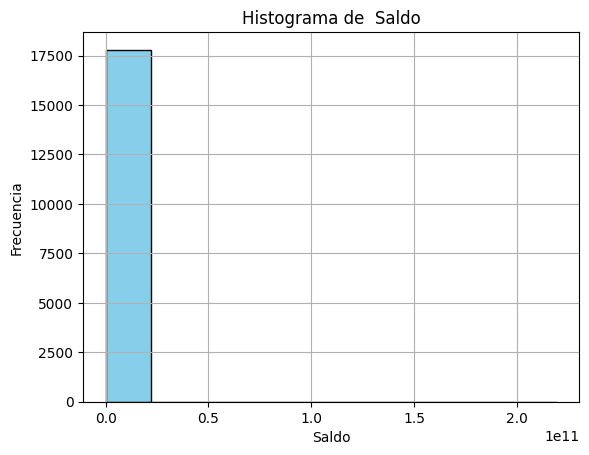

In [35]:
#HISTOGRAMA
plt.hist(df1['SALDO'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de  Saldo')
plt.xlabel('Saldo')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Aquellos que su estado esta activo tienen un saldo pero hay algunos que su saldo es alto a comparacion de otros, por ende para poder apreciar esta diferencia se eliminara estos datos y asi tener una mejor visualizacion del saldo que se obtiene en cada año

In [36]:

# Obtener el valor máximo y mínimo de la columna 'Saldo'
saldo_maximo = df1['SALDO'].max()
saldo_minimo = df1['SALDO'].min()
saldo_maximo

219409707380.0

In [96]:
# Obtener el índice del valor máximo en la columna 'SALDO'
indice_maximo = df2['SALDO'].idxmax()

# Obtener la línea correspondiente al valor máximo
linea_maximo = df2.loc[indice_maximo]

print("Línea con el valor máximo:")
print(linea_maximo)

Línea con el valor máximo:
Activo                                     000094544-000
Serial                                           94544.0
Descripcion      EDIFICIO SEDE PRINCIPAL CR 38BIS 5B2 04
ESTADO                                            Activo
Fecha                                2017-10-01 00:00:00
Costo                                   22524950947600.0
SALDO                                     219409707380.0
C. Costo                                      62010119.0
Desc. C.Costo                             SEDE PRINCIPAL
Name: 39582, dtype: object


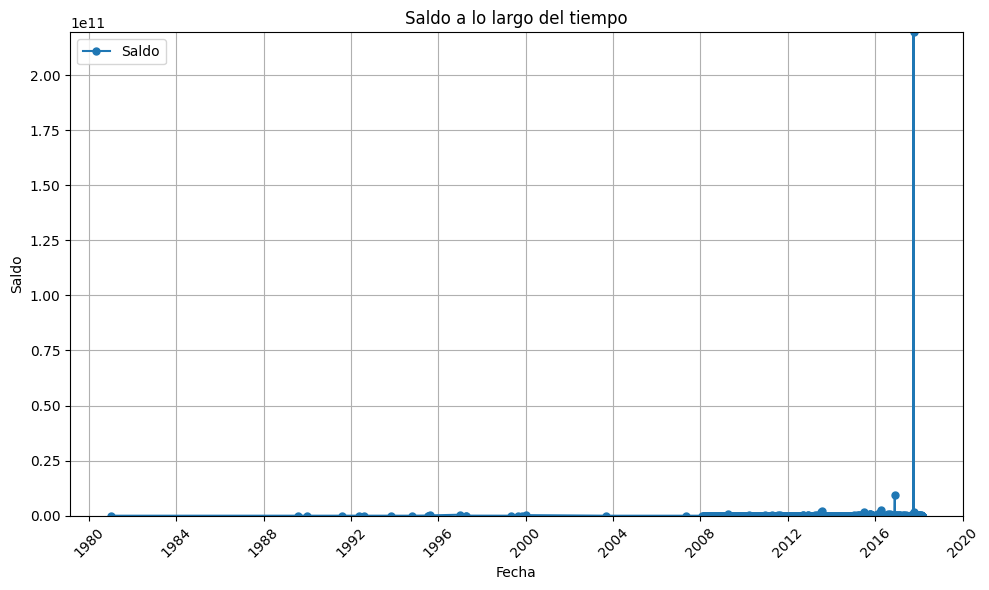

In [38]:
# Ordenar el DataFrame por la columna 'Fecha' (opcional, pero puede ser útil para visualización)
df2 = df1.sort_values(by='Fecha')

# Obtener el valor máximo y mínimo de la columna 'Saldo'
saldo_maximo = df2['SALDO'].max()
saldo_minimo = df2['SALDO'].min()

# Crear el gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.plot(df2['Fecha'], df2['SALDO'], marker='o', linestyle='-', markersize=5, label='Saldo')  # Graficar las fechas vs el saldo
plt.title('Saldo a lo largo del tiempo')  # Título del gráfico
plt.xlabel('Fecha')  # Etiqueta del eje x
plt.ylabel('Saldo')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.ylim(saldo_minimo - 100, saldo_maximo + 100)  # Ajustar los límites del eje y
plt.grid(True)  # Habilitar las líneas de la cuadrícula
plt.legend()  # Agregar leyenda
plt.tight_layout()  # Ajustar el diseño
plt.show()  # Mostrar el gráfico

In [39]:

df2.drop(columns=['Unnamed: 2'], inplace=True) #Nos dimos cuenta que es el mismo que el serial
df2.drop(columns=[ "Periodos a depreciar PCGA"], inplace=True)
df2

,Activo,Serial,Descripcion,ESTADO,Fecha,Costo,SALDO,C. Costo,Desc. C.Costo
82837,000014999-000,14999.0,TERRENO EDIF 2 PISOS CARRERA 38A 5A-108,Activo,1981-01-01,"$ 870.644,00",5507046.59,62010101.0,EDIFICIO DE 2 PISOS
20125,000013256-000,13256.0,TERRENO 06 DIA.38a No.38a-44,Activo,1989-08-03,"$ 1.820.000,00",11511966.18,62010113.0,CASA CARTERA
57015,000015001-000,15001.0,TERRENO EDIF 13 PISOS CARRERA 38A 5A-100,Activo,1989-12-29,"$ 4.396.000,00",27805801.37,62010103.0,EDIFICIO DE 13 PISOS TA
15971,000013258-000,13258.0,TERRENO 03 CASA MEDICINA NUCLEAR,Activo,1991-08-13,"$ 1.147.400,00",7257596.66,62010108.0,CASA ANGIOGRAFIA Y CARDIOLOGIA
18608,000013257-000,13257.0,TERRENO 02 CASA RADIOTERAPIA,Activo,1992-05-19,"$ 1.620.000,00",9012023.07,62010110.0,CASA ONCOLOGIA Y QUIMIOTERAPIA
...,...,...,...,...,...,...,...,...,...
20304,000096944-000,96944.0,TALADRO PERCUTOR MAKITA S/0238000,Activo,2018-02-21,"$ 1.890.000,00",1885432.00,60030202.0,EJECUCION DE OBRAS
16185,000096943-000,96943.0,PULIDORA DEWALT S/642830,Activo,2018-02-21,"$ 1.199.900,00",1197000.00,60030202.0,EJECUCION DE OBRAS
45363,000096974-000,96974.0,TRANSDUCTOR ENDOCAVITARIO S/225459KR7,Activo,2018-02-22,"$ 28.426.700,00",28355700.00,70051003.0,EQUIPOS UNIDAD DIAGNOSTICO PRENATAL
17412,000051944-000,51944.0,BALANZA ELECTRONICA SECA S/5874313101146,Activo,NaT,"$ 1.392.000,00",800400.00,70054403.0,MANO DE OBRA RESONANCIA SEDE PRINCIPAL


Se observa que en la grafica hay muchos datos anteriores a 2008 que su saldo es muy bajo ($1.0), por esa razon solo tendremos en cuenta aquellos activos despues del 2008

In [40]:
# Suponiendo que 'Fecha' es la columna de fechas en tu DataFrame 'df4'
df4= df2[df2['Fecha'] > '2008-01-01']
len(df4)

17774

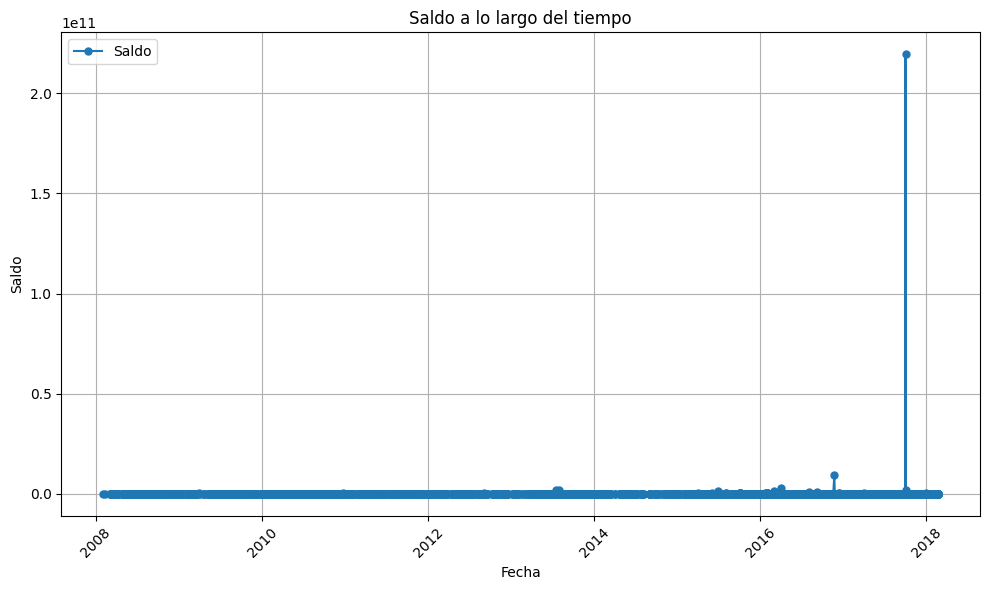

In [41]:
# Crear el gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.plot(df4['Fecha'], df4['SALDO'], marker='o', linestyle='-', markersize=5, label='Saldo')  # Graficar las fechas vs el saldo
plt.title('Saldo a lo largo del tiempo')  # Título del gráfico
plt.xlabel('Fecha')  # Etiqueta del eje x
plt.ylabel('Saldo')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(True)  # Habilitar las líneas de la cuadrícula
plt.legend()  # Agregar leyenda
plt.tight_layout()  # Ajustar el diseño
plt.show()  # Mostrar el gráfico


In [42]:
# Eliminar las filas donde el saldo sea igual a 1
df5 = df4[df1['SALDO'] != 1]
len(df5)

C:\Users\jimmy\AppData\Local\Temp\ipykernel_30608\1232971814.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df5 = df4[df1['SALDO'] != 1]


17759

In [43]:
# Obtener el valor máximo y mínimo de la columna 'Saldo'
saldo_maximo = df5['SALDO'].max()
saldo_minimo = df5['SALDO'].min()
saldo_minimo

991.85

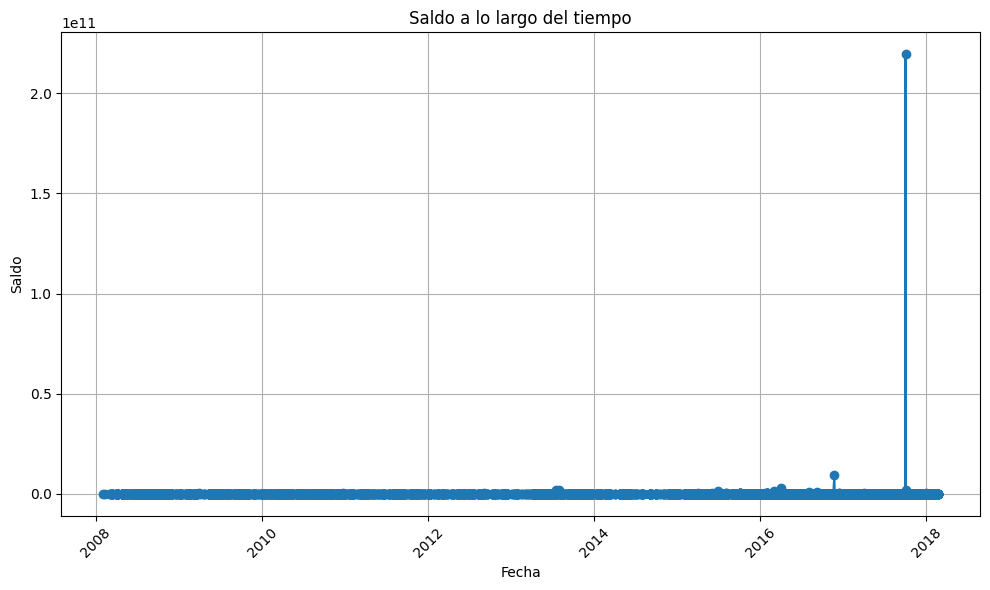

In [44]:
# Crear el gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.plot(df5['Fecha'], df5['SALDO'], marker='o', linestyle='-')  # Graficar las fechas vs el saldo
plt.title('Saldo a lo largo del tiempo')  # Título del gráfico
plt.xlabel('Fecha')  # Etiqueta del eje x
plt.ylabel('Saldo')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.autoscale(enable=True, axis='y')

plt.grid(True)  # Habilitar las líneas de la cuadrícula
plt.tight_layout()  # Ajustar el diseño
plt.show()  # Mostrar el gráfico

* Vamos a sacar la media y la mediana de los saldos en los cuales el estado se activo

In [45]:
media_saldo_Act=df5['SALDO'].mean()
mediana_saldo_Act=df5['SALDO'].median()
media_saldo_Act

19486451.00907934

In [46]:
mediana_saldo_Act

1101532.78

* Se puede observar que los datos de la media en los que hay valores son bastante grandes y desvian los datos

In [47]:
saldo_maximo=df5['SALDO'].max()
saldo_maximo

219409707380.0

In [48]:
df6=df5[df5['Serial']!=94544.0]

In [49]:
saldo_maximo=df6['SALDO'].max()
saldo_maximo

9478487700.0

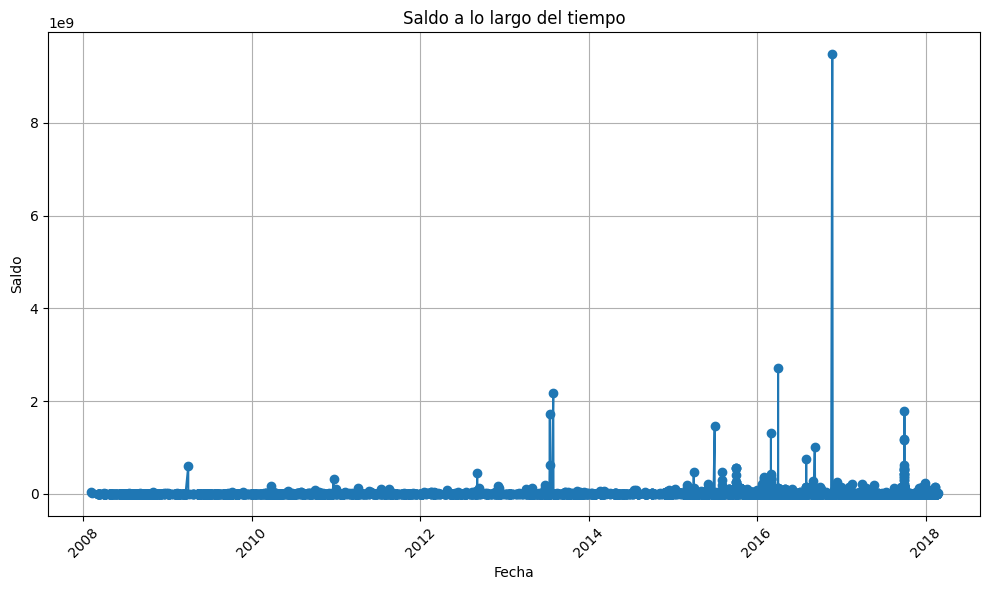

In [50]:
# Crear el gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.plot(df6['Fecha'], df6['SALDO'], marker='o', linestyle='-')  # Graficar las fechas vs el saldo
plt.title('Saldo a lo largo del tiempo')  # Título del gráfico
plt.xlabel('Fecha')  # Etiqueta del eje x
plt.ylabel('Saldo')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.autoscale(enable=True, axis='y')

plt.grid(True)  # Habilitar las líneas de la cuadrícula
plt.tight_layout()  # Ajustar el diseño
plt.show()  # Mostrar el gráfico

In [51]:
# Obtener el índice del valor máximo en la columna 'SALDO'
indice_maximo = df6['SALDO'].idxmax()

# Obtener la línea correspondiente al valor máximo
linea_maximo = df6.loc[indice_maximo]

print("Línea con el valor máximo:")
print(linea_maximo)

Línea con el valor máximo:
Activo                  000088387-000
Serial                        88387.0
Descripcion      LOTE OSCAR SCARPETTA
ESTADO                         Activo
Fecha             2016-11-22 00:00:00
Costo              $ 9.478.487.700,00
SALDO                    9478487700.0
C. Costo                   62010119.0
Desc. C.Costo          SEDE PRINCIPAL
Name: 83734, dtype: object


In [52]:
df7=df6[df6['Serial']!=88387.0]

In [53]:
# Obtener el índice del valor máximo en la columna 'SALDO'
indice_maximo = df7['SALDO'].idxmax()

# Obtener la línea correspondiente al valor máximo
linea_maximo = df7.loc[indice_maximo]

print("Línea con el valor máximo:")
print(linea_maximo)

Línea con el valor máximo:
Activo                                000080514-000
Serial                                      80514.0
Descripcion      RESONADOR SIEMENS MAGNETOM S/57348
ESTADO                                       Activo
Fecha                           2016-04-01 00:00:00
Costo                            $ 3.316.314.720,00
SALDO                                  2707494609.0
C. Costo                                 70054402.0
Desc. C.Costo     EQUIPOS RESONANCIA SEDE PRINCIPAL
Name: 46959, dtype: object


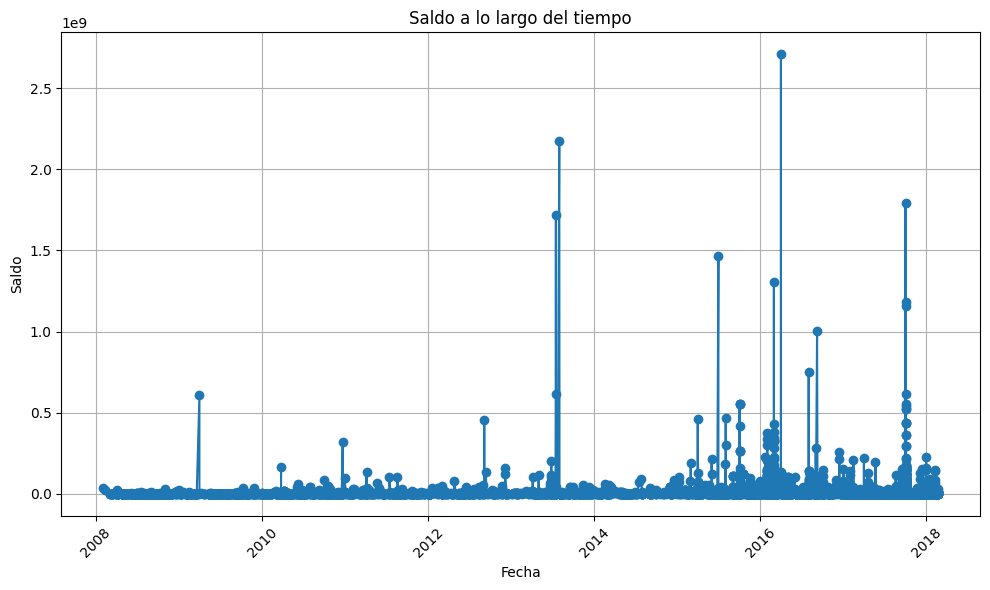

In [54]:
# Crear el gráfico
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.plot(df7['Fecha'], df7['SALDO'], marker='o', linestyle='-')  # Graficar las fechas vs el saldo
plt.title('Saldo a lo largo del tiempo')  # Título del gráfico
plt.xlabel('Fecha')  # Etiqueta del eje x
plt.ylabel('Saldo')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.autoscale(enable=True, axis='y')

plt.grid(True)  # Habilitar las líneas de la cuadrícula
plt.tight_layout()  # Ajustar el diseño
plt.show()  # Mostrar el gráfico

En la anterior grafica podemos observar como son los saldos de cada año

In [55]:
media_saldo_Act=df7['SALDO'].mean()
mediana_saldo_Act=df7['SALDO'].median()
print(media_saldo_Act, mediana_saldo_Act)

6598619.608618573 1101532.78


In [56]:
fecha_mas_reciente = df7['Fecha'].max()
print("La fecha más reciente en la base de datos es:", fecha_mas_reciente)

La fecha más reciente en la base de datos es: 2018-02-22 00:00:00


### Se va a filtrar los datos por cada año desde el 2008 hasta el 2018

In [57]:
# Filtrar las fechas para el año 2008
filtro_2008 = (df2['Fecha'] > '2008-01-01') & (df2['Fecha'] < '2009-01-01')

# Aplicar el filtro y obtener las filas correspondientes a 2008
df_2008 = df2[filtro_2008]
len(df_2008)

714

In [58]:
# Filtrar las fechas para el año 2009
filtro_2009 = (df2['Fecha'] > '2009-01-01') & (df2['Fecha'] < '2010-01-01')

# Aplicar el filtro y obtener las filas correspondientes a 2009
df_2009 = df2[filtro_2009]
len(df_2009)

855

In [59]:
# Filtrar las fechas para el año 2010
filtro_2010 = (df2['Fecha'] > '2010-01-01') & (df2['Fecha'] < '2011-01-01')

# Aplicar el filtro y obtener las filas correspondientes a 2010
df_2010 = df2[filtro_2010]
len(df_2010)

878

In [60]:
# Filtrar las fechas para el año 2011
filtro_2011 = (df2['Fecha'] > '2011-01-01') & (df2['Fecha'] < '2012-01-01')

# Aplicar el filtro y obtener las filas correspondientes a 2011
df_2011 = df2[filtro_2011]
len(df_2011)

355

In [61]:
# Filtrar las fechas para el año 2012
filtro_2012 = (df2['Fecha'] > '2012-01-01') & (df2['Fecha'] < '2013-01-01')

# Aplicar el filtro y obtener las filas correspondientes a 2012
df_2012 = df2[filtro_2012]
len(df_2012)

267

In [62]:
# Filtrar las fechas para el año 2013
filtro_2013 = (df2['Fecha'] > '2013-01-01') & (df2['Fecha'] < '2014-01-01')

# Aplicar el filtro y obtener las filas correspondientes a 2013
df_2013 = df2[filtro_2013]
len(df_2013)

444

In [63]:
# Filtrar las fechas para el año 2014
filtro_2014 = (df2['Fecha'] > '2014-01-01') & (df2['Fecha'] < '2015-01-01')

# Aplicar el filtro y obtener las filas correspondientes a 2014
df_2014 = df2[filtro_2014]
len(df_2014)

540

In [64]:
# Filtrar las fechas para el año 2015
filtro_2015 = (df2['Fecha'] > '2015-01-01') & (df2['Fecha'] < '2016-01-01')

# Aplicar el filtro y obtener las filas correspondientes a 2015
df_2015 = df2[filtro_2015]
len(df_2015)

2873

In [65]:
# Filtrar las fechas para el año 2016
filtro_2016 = (df2['Fecha'] > '2016-01-01') & (df2['Fecha'] < '2017-01-01')

# Aplicar el filtro y obtener las filas correspondientes a 2016
df_2016 = df2[filtro_2016]
len(df_2016)

4398

In [66]:
# Filtrar las fechas para el año 2017
filtro_2017 = (df2['Fecha'] > '2017-01-01') & (df2['Fecha'] < '2018-01-01')

# Aplicar el filtro y obtener las filas correspondientes a 2017
df_2017 = df2[filtro_2017]
len(df_2017)

5810

In [67]:
# Filtrar las fechas para el año 2018
filtro_2018 = (df2['Fecha'] > '2018-01-01') & (df2['Fecha'] < '2018-02-23')

# Aplicar el filtro y obtener las filas correspondientes a 2018
df_2018 = df2[filtro_2018]
len(df_2018)

319

In [68]:
len(df7)

17757

Se van a sumar los datos ubicados en la columna saldo de cada año anteriormente filtrado

In [69]:
suma_2008 = df_2008['SALDO'].sum()
suma_2009 = df_2009['SALDO'].sum()
suma_2010 = df_2010['SALDO'].sum()
suma_2011 = df_2011['SALDO'].sum()
suma_2012 = df_2012['SALDO'].sum()
suma_2013 = df_2013['SALDO'].sum()
suma_2014 = df_2014['SALDO'].sum()
suma_2015 = df_2015['SALDO'].sum()
suma_2016 = df_2016['SALDO'].sum()
suma_2017 = df_2017['SALDO'].sum()
suma_2018 = df_2018['SALDO'].sum()

print(suma_2008,suma_2009,suma_2010,suma_2011,suma_2012,suma_2013,suma_2014,suma_2015,suma_2016,suma_2017,suma_2018)

364451761.28999996 953926275.02 1980988495.5699997 1299830441.3200002 2108891296.8200002 6776526742.43 2991501929.66 22081116250.43 50005005178.0 255319481026.0 1293314281.0


In [70]:
#grafico de la suma de saldos por año

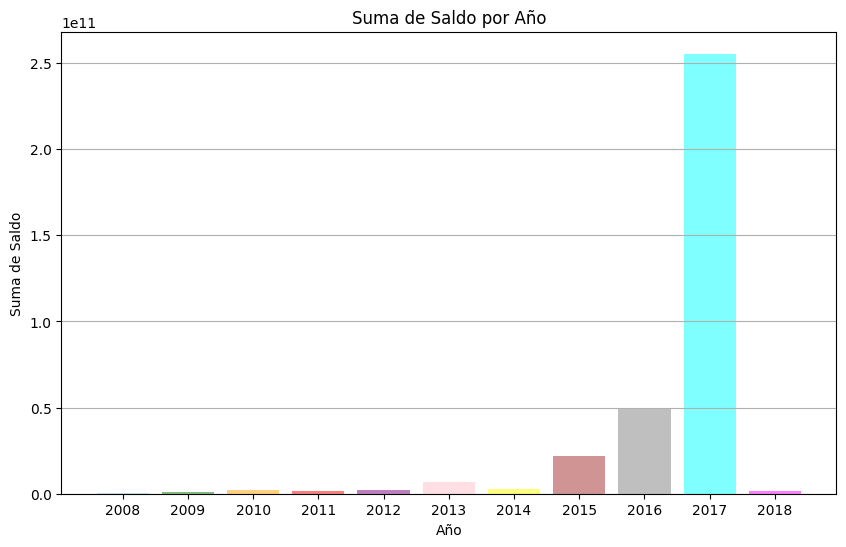

In [71]:
# Lista de las sumas de saldo por año
saldos_por_año = [suma_2008, suma_2009, suma_2010, suma_2011, suma_2012, suma_2013, suma_2014, suma_2015, suma_2016, suma_2017, suma_2018]

# Lista de colores para cada barra
colores = ['skyblue', 'green', 'orange', 'red', 'purple', 'pink', 'yellow', 'brown', 'gray', 'cyan', 'magenta']

# Crear el histograma con colores diferentes para cada barra
plt.figure(figsize=(10, 6))
plt.bar(range(2008, 2019), saldos_por_año, color=colores, alpha=0.5)
plt.xlabel('Año')
plt.ylabel('Suma de Saldo')
plt.title('Suma de Saldo por Año')
plt.xticks(range(2008, 2019))
plt.grid(axis='y')
plt.show()


2016 y 2017 son los años en los cuales todavia se tiene un saldo elevado

#### DIAGRAMA DE CAJA DE SALDOS POR AÑO

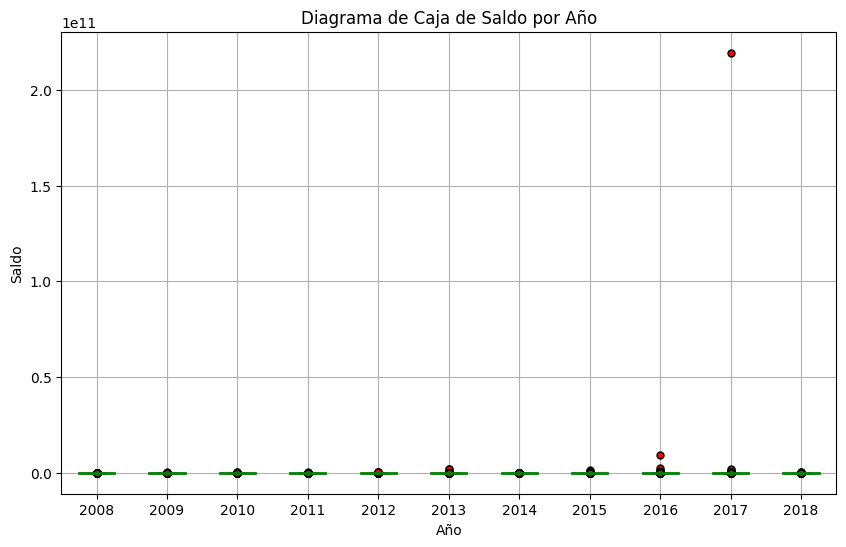

In [72]:


# Lista de DataFrames por año
dataframes_por_año = [df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018]

# Lista de datos de saldo por año
saldos_por_año = [df['SALDO'] for df in dataframes_por_año]

# Definir colores para las cajas, bigotes y valores atípicos
color_cajas = 'skyblue'
color_bigotes = 'black'
color_valores_atipicos = 'red'
color_mediana = 'green'

# Crear el diagrama de caja con colores personalizados
plt.figure(figsize=(10, 6))
plt.boxplot(saldos_por_año, labels=range(2008, 2019),
            boxprops=dict(color=color_cajas),
            whiskerprops=dict(color=color_bigotes),
            flierprops=dict(marker='o', markerfacecolor=color_valores_atipicos, markersize=5, linestyle='none'),
            medianprops=dict(color=color_mediana, linewidth=2))
plt.xlabel('Año')
plt.ylabel('Saldo')
plt.title('Diagrama de Caja de Saldo por Año')
plt.grid(True)
plt.show()

Debido a datos atipicos vemos que en el 2017 se hicieron compras por encima de lo normal, pero en se observa que la media de los años es similar

In [73]:
# Lista para almacenar las medias de saldo por año
medias_por_año = []

# Calcular la media de saldo para cada año
for año in range(2008, 2019):
    nombre_df = f"df_{año}"  # Nombre del DataFrame por año
    df_año = globals()[nombre_df]  # Obtener el DataFrame por año
    media_año = df_año['SALDO'].mean()  # Calcular la media de SALDO para el año
    medias_por_año.append(media_año)

# Imprimir las medias por año
for año, media in zip(range(2008, 2019), medias_por_año):
    print(f"Año {año}: Media de saldo = {media}")


Año 2008: Media de saldo = 510436.64046218485
Año 2009: Media de saldo = 1115703.2456374269
Año 2010: Media de saldo = 2256251.1339066057
Año 2011: Media de saldo = 3661494.200901409
Año 2012: Media de saldo = 7898469.276479402
Año 2013: Media de saldo = 15262447.618085586
Año 2014: Media de saldo = 5539818.388259259
Año 2015: Media de saldo = 7685734.85918204
Año 2016: Media de saldo = 11369942.059572533
Año 2017: Media de saldo = 43944833.223063685
Año 2018: Media de saldo = 4054276.7429467086


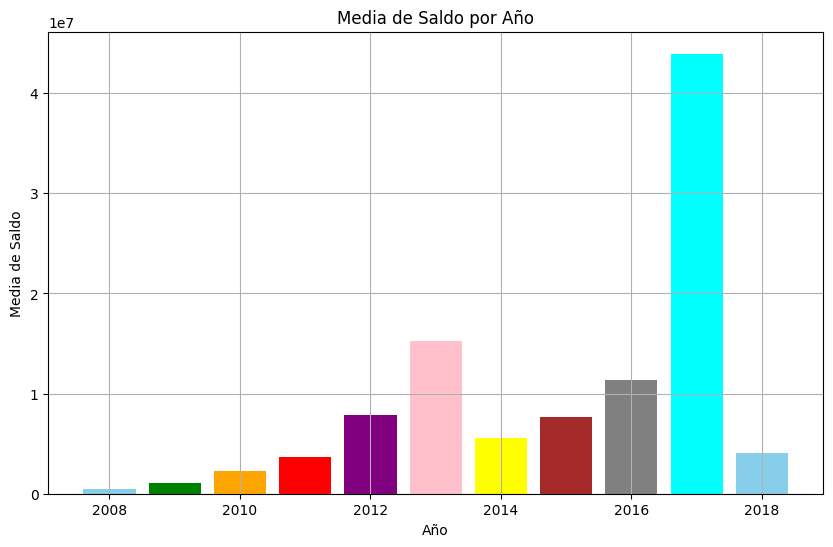

In [74]:


# Lista para almacenar las medias de saldo por año
medias_por_año = []

# Calcular la media de saldo para cada año y almacenarla en la lista
for año in range(2008, 2019):
    nombre_df = f"df_{año}"  # Nombre del DataFrame por año
    df_año = globals()[nombre_df]  # Obtener el DataFrame por año
    media_año = df_año['SALDO'].mean()  # Calcular la media de SALDO para el año
    medias_por_año.append(media_año)

# Crear el gráfico de barras
# Lista de colores para cada barra
colores = ['skyblue', 'green', 'orange', 'red', 'purple', 'pink', 'yellow', 'brown', 'gray', 'cyan']

# Crear el gráfico de barras con colores diferentes para cada barra
plt.figure(figsize=(10, 6))
plt.bar(range(2008, 2019), medias_por_año, color=colores)
plt.xlabel('Año')
plt.ylabel('Media de Saldo')
plt.title('Media de Saldo por Año')
plt.grid(True)
plt.show()


Si tomamos los saldos del 2017 que fue donde se hicieron dos compras las cuales fueron mas costosas de lo normal vemos que del año 2017 es donde la empresa tiene mas deuda, en el 2013 es el segndo año que tiene un promedio de saldo elevado

## TRANSFERENCIA MYSQL

In [ ]:
!pip install  mysql.connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp310-cp310-linux_x86_64.whl size=247953 sha256=3d4f507eeb3e2f90add8524a4fea9ceacb5e3ac59e73295e0c4b0a15b9af1a5e
  Stored in directory: /root/.cache/pip/wheels/76/48/9b/da67ff1a18fe8e9d428f9b1a177716d4a7d363d2bbe83bf6cf
Successfully built mysql.connector


In [75]:
import matplotlib.pyplot as plt
import mysql.connector

In [ ]:
conn= mysql.connector.connect(user="root", password="admin",host="127.0.0.1")
cursor= conn.cursor()
query="SHOW DATABASES"
cursor.execute(query)

for x in cursor:
    print(x)

conn.close()

('gestion',)
('information_schema',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('world',)


In [ ]:
conn= mysql.connector.connect(user="root", password="admin",host="127.0.0.1")
cursor= conn.cursor()
query="CREATE DATABASE Clinica"
cursor.execute(query)    
conn.close()


In [ ]:
conn= mysql.connector.connect(user="root", password="admin",host="127.0.0.1", database="Clinica")
cursor= conn.cursor()
query="SHOW TABLES "
cursor.execute(query)

for x in cursor:
    print(x)
    
conn.close()

In [ ]:
import mysql.connector

# Conectarse a la base de datos
conn = mysql.connector.connect(user="root", password="admin", host="127.0.0.1", database="Clinica")
cursor = conn.cursor()

# Crear la tabla Inventario
cursor.execute("""
CREATE TABLE Inventario (
    Activo INT,
    Serial INT,
    Descripcion TEXT,
    ESTADO TEXT,
    Fecha DATETIME,
    Costo FLOAT,
    SALDO FLOAT,
    `C.COSTO` FLOAT, -- Columna con punto, escapada con comillas invertidas
    `Desc.C.Costo` TEXT -- Columna con punto, escapada con comillas invertidas
)
""")

# Guardar los cambios y cerrar la conexión
conn.commit()
conn.close()

print("Se creó la tabla Inventario correctamente.")


Se creó la tabla Inventario correctamente.


Esta funcion nos ayudara a entrar al MySQL

In [76]:
def leer():
    conn= mysql.connector.connect(user="root", password="admin",host="127.0.0.1", database="Clinica")
    cursor= conn.cursor()
    query= f'SELECT * FROM Inventario'
    cursor.execute(query)
    datos=cursor.fetchall()
    conn.commit()
    conn.close()
    
    for x in datos:
        print(x)

In [ ]:
leer()

In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17796 entries, 82837 to 83656
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Activo         17796 non-null  object 
 1   Serial         17796 non-null  float64
 2   Descripcion    17796 non-null  object 
 3   ESTADO         17796 non-null  object 
 4   Fecha          17796 non-null  object 
 5   Costo          17796 non-null  object 
 6   SALDO          17796 non-null  float64
 7   C. Costo       17796 non-null  float64
 8   Desc. C.Costo  17796 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.9+ MB


In [86]:
df2.head()

,Activo,Serial,Descripcion,ESTADO,Fecha,Costo,SALDO,C. Costo,Desc. C.Costo
82837,000014999-000,14999.0,TERRENO EDIF 2 PISOS CARRERA 38A 5A-108,Activo,1981-01-01 00:00:00,870644.00,5507046.59,62010101.0,EDIFICIO DE 2 PISOS
20125,000013256-000,13256.0,TERRENO 06 DIA.38a No.38a-44,Activo,1989-08-03 00:00:00,1820000.00,11511966.18,62010113.0,CASA CARTERA
57015,000015001-000,15001.0,TERRENO EDIF 13 PISOS CARRERA 38A 5A-100,Activo,1989-12-29 00:00:00,4396000.00,27805801.37,62010103.0,EDIFICIO DE 13 PISOS TA
15971,000013258-000,13258.0,TERRENO 03 CASA MEDICINA NUCLEAR,Activo,1991-08-13 00:00:00,1147400.00,7257596.66,62010108.0,CASA ANGIOGRAFIA Y CARDIOLOGIA
18608,000013257-000,13257.0,TERRENO 02 CASA RADIOTERAPIA,Activo,1992-05-19 00:00:00,1620000.00,9012023.07,62010110.0,CASA ONCOLOGIA Y QUIMIOTERAPIA


In [90]:
# Eliminar filas con valores vacíos en la columna 'Costo'
df2 = df2[df2['Costo'] != '']

# Convertir a tipo float
df2['Costo'] = df2['Costo'].astype(float)



C:\Users\jimmy\AppData\Local\Temp\ipykernel_30608\525878683.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Costo'] = df2['Costo'].astype(float)


In [91]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17795 entries, 82837 to 83656
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Activo         17795 non-null  object 
 1   Serial         17795 non-null  float64
 2   Descripcion    17795 non-null  object 
 3   ESTADO         17795 non-null  object 
 4   Fecha          17795 non-null  object 
 5   Costo          17795 non-null  float64
 6   SALDO          17795 non-null  float64
 7   C. Costo       17795 non-null  float64
 8   Desc. C.Costo  17795 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1.4+ MB


In [92]:
df2['Activo'] = df2['Activo'].astype(str)
df2.head()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17795 entries, 82837 to 83656
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Activo         17795 non-null  object 
 1   Serial         17795 non-null  float64
 2   Descripcion    17795 non-null  object 
 3   ESTADO         17795 non-null  object 
 4   Fecha          17795 non-null  object 
 5   Costo          17795 non-null  float64
 6   SALDO          17795 non-null  float64
 7   C. Costo       17795 non-null  float64
 8   Desc. C.Costo  17795 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1.4+ MB


C:\Users\jimmy\AppData\Local\Temp\ipykernel_30608\1023739912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Activo'] = df2['Activo'].astype(str)


In [ ]:
# Identificar los valores NaT en la columna 'Fecha'
valores_nulos = df2[df2['Fecha'].isna()]

# Mostrar los valores NaT
print("Valores NaT en la columna 'Fecha':")
print(valores_nulos)

Valores NaT en la columna 'Fecha':
              Activo   Serial                               Descripcion  \
17412  000051944-000  51944.0  BALANZA ELECTRONICA SECA S/5874313101146   
83656  000047172-000  47172.0         MONITOR S.V. NK S/02815  PVM-2701   

       ESTADO Fecha           Costo       SALDO    C. Costo  \
17412  Activo   NaT  $ 1.392.000,00   800400.00  70054403.0   
83656  Activo   NaT  $ 9.280.000,00  2951046.59  70030117.0   

                                Desc. C.Costo  
17412  MANO DE OBRA RESONANCIA SEDE PRINCIPAL  
83656   HOSPITALIZACION PISO 6 SEDE PRINCIPAL  


In [ ]:
# Filtrar los datos por los valores de serial 17412 y 83656
datos_filtrados = df2.loc[df2['Serial'].isin([51944.0, 47172.0 ])]

# Mostrar los datos filtrados
print("Información correspondiente al Serial 17412 y 83656:")
print(datos_filtrados)

Información correspondiente al Serial 17412 y 83656:
              Activo   Serial                               Descripcion  \
17412  000051944-000  51944.0  BALANZA ELECTRONICA SECA S/5874313101146   
83656  000047172-000  47172.0         MONITOR S.V. NK S/02815  PVM-2701   

       ESTADO      Fecha           Costo       SALDO    C. Costo  \
17412  Activo 2014-10-01  $ 1.392.000,00   800400.00  70054403.0   
83656  Activo 2014-10-01  $ 9.280.000,00  2951046.59  70030117.0   

                                Desc. C.Costo  
17412  MANO DE OBRA RESONANCIA SEDE PRINCIPAL  
83656   HOSPITALIZACION PISO 6 SEDE PRINCIPAL  


In [78]:
# Calcular la media de los saldos
media_saldos = df2['SALDO'].mean()

# Encontrar el saldo más cercano a la media de saldos
saldo_cercano = df2.loc[(df2['SALDO'] - media_saldos).abs().idxmin(), 'SALDO']

# Obtener la fecha correspondiente a ese saldo más cercano
fecha_saldo_cercano = df2.loc[df2['SALDO'] == saldo_cercano, 'Fecha'].iloc[0]

# Llenar los valores nulos en la columna 'Fecha' con la fecha correspondiente al saldo más cercano a la media de saldos
df2['Fecha'] = df2['Fecha'].fillna(fecha_saldo_cercano)

# Verificar que ya no hay valores nulos en la columna 'Fecha'
print("Valores nulos en la columna 'Fecha' después de llenarlos:")
print(df2[df2['Fecha'].isnull()])



Valores nulos en la columna 'Fecha' después de llenarlos:
Empty DataFrame
Columns: [Activo, Serial, Descripcion, ESTADO, Fecha, Costo, SALDO, C. Costo, Desc. C.Costo]
Index: []


In [79]:
import datetime

df2['Fecha'] = df2['Fecha'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

In [ ]:
import mysql.connector
# Conectar a la base de datos
conn = mysql.connector.connect(user="root", password="admin", host="127.0.0.1", database="Clinica")
cursor = conn.cursor()

# Consulta para cambiar el tipo de columna 'Activo' a TEXT
query = "ALTER TABLE Inventario MODIFY Activo TEXT"

# Ejecutar la consulta
cursor.execute(query)

# Guardar los cambios y cerrar la conexión
conn.commit()
conn.close()

print("Se cambió el tipo de columna 'Activo' a TEXT en la tabla 'Inventario'.")

Se cambió el tipo de columna 'Activo' a TEXT en la tabla 'Inventario'.


In [109]:
# Conectar a la base de datos
conn = mysql.connector.connect(user="root", password="admin", host="127.0.0.1", database="Clinica")
cursor = conn.cursor()

# Consulta para eliminar todos los datos de la tabla 'Inventario'
delete_query = "DELETE FROM Inventario"

# Ejecutar la consulta de eliminación
cursor.execute(delete_query)

# Guardar los cambios y cerrar la conexión
conn.commit()
conn.close()

print("Se eliminaron todos los datos de la tabla 'Inventario' en la base de datos 'Clinica'.")

Se eliminaron todos los datos de la tabla 'Inventario' en la base de datos 'Clinica'.


In [110]:
import mysql.connector

# Conectar a la base de datos
conn = mysql.connector.connect(user="root", password="admin", host="127.0.0.1", database="Clinica")
cursor = conn.cursor()

# Consulta para eliminar todos los datos de la tabla 'Inventario'
delete_query = "DELETE FROM Inventario"
cursor.execute(delete_query)

# Consulta para insertar los datos en la tabla 'Inventario' con los valores de SALDO y Costo convertidos a cadenas
insert_query = """
    INSERT INTO Inventario (Activo, Serial, Descripcion, ESTADO, Fecha, Costo, SALDO, `C.COSTO`, `Desc.C.Costo`)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Si usas DataFrame:
for row in df2.itertuples(index=False):
    # Convertir los valores de SALDO y Costo a cadenas con el formato deseado
    row = list(row)  # Convertir la tupla a lista para poder modificarla
    row[5] = "{:.2f}".format(row[5])  # Convertir el valor Costo a cadena con dos decimales
    row[6] = "{:.2f}".format(row[6])  # Convertir el valor SALDO a cadena con dos decimales
    # Insertar los datos con los valores convertidos a cadenas
    cursor.execute(insert_query, row)

# Guardar los cambios y cerrar la conexión
conn.commit()
conn.close()

print("Los datos se insertaron correctamente en la tabla 'Inventario'.")


Los datos se insertaron correctamente en la tabla 'Inventario'.


In [111]:
leer()

('000014999-000', 14999, 'TERRENO EDIF 2 PISOS CARRERA 38A 5A-108', 'Activo', datetime.datetime(1981, 1, 1, 0, 0), 87064400.0, 5507050.0, 62010100.0, 'EDIFICIO DE 2 PISOS')
('000013256-000', 13256, 'TERRENO 06 DIA.38a No.38a-44', 'Activo', datetime.datetime(1989, 8, 3, 0, 0), 182000000.0, 11512000.0, 62010100.0, 'CASA CARTERA')
('000015001-000', 15001, 'TERRENO EDIF 13 PISOS CARRERA 38A 5A-100', 'Activo', datetime.datetime(1989, 12, 29, 0, 0), 439600000.0, 27805800.0, 62010100.0, 'EDIFICIO DE 13 PISOS TA')
('000013258-000', 13258, 'TERRENO 03 CASA MEDICINA NUCLEAR', 'Activo', datetime.datetime(1991, 8, 13, 0, 0), 114740000.0, 7257600.0, 62010100.0, 'CASA ANGIOGRAFIA Y CARDIOLOGIA')
('000013257-000', 13257, 'TERRENO 02 CASA RADIOTERAPIA', 'Activo', datetime.datetime(1992, 5, 19, 0, 0), 162000000.0, 9012020.0, 62010100.0, 'CASA ONCOLOGIA Y QUIMIOTERAPIA')
('000014997-000', 14997, 'TERRENO EDIFICIO 5 PISOS CRA. 38A 5A-108', 'Activo', datetime.datetime(1992, 8, 1, 0, 0), 100000000.0, 52380

In [114]:
# Conectar a la base de datos
conn = mysql.connector.connect(user="root", password="admin", host="127.0.0.1", database="Clinica")
cursor = conn.cursor()

# Consulta para obtener la información de la fila con SERIAL 39008
query = "SELECT * FROM Inventario WHERE Serial = 39008"

# Ejecutar la consulta
cursor.execute(query)

# Obtener el resultado
row = cursor.fetchone()

# Si se encontró la fila, imprimir la información
if row:
    print("Información de la fila con SERIAL 39008:")
    print("Activo:", row[0])
    print("Serial:", row[1])
    print("Descripcion:", row[2])
    print("ESTADO:", row[3])
    print("Fecha:", row[4])
    print("Costo:", row[5])
    print("SALDO:", row[6])
    print("C.COSTO:", row[7])
    print("Desc.C.Costo:", row[8])
else:
    print("No se encontró ninguna fila con SERIAL 39008 en la tabla 'Inventario'.")

# Cerrar la conexión
conn.close()

Información de la fila con SERIAL 39008:
Activo: 000039008-000
Serial: 39008
Descripcion: RESONADOR MAGNETOM AVANTO SIEMENS 26597
ESTADO: Activo
Fecha: 2008-04-01 00:00:00
Costo: 258623000000.0
SALDO: 21551900.0
C.COSTO: 70054400.0
Desc.C.Costo: EQUIPOS RESONANCIA SEDE PRINCIPAL


In [115]:
# Filtrar el DataFrame para obtener las filas con SERIAL igual a 39008
filtro_serial = df2[df2['Serial'] == 39008]

# Imprimir la información de las filas filtradas
print("Información de las filas con SERIAL 39008:")
print(filtro_serial)

Información de las filas con SERIAL 39008:
              Activo   Serial                              Descripcion  \
35952  000039008-000  39008.0  RESONADOR MAGNETOM AVANTO SIEMENS 26597   

       ESTADO                Fecha         Costo        SALDO    C. Costo  \
35952  Activo  2008-04-01 00:00:00  2.586233e+11  21551942.18  70054402.0   

                           Desc. C.Costo  
35952  EQUIPOS RESONANCIA SEDE PRINCIPAL  


In [118]:

import matplotlib.pyplot as plt
def graficar_saldos():
    # Conectar a la base de datos MySQL
    conn = mysql.connector.connect(user="root", password="admin", host="127.0.0.1", database="Clinica")
    cursor = conn.cursor()

    # Consulta SQL para seleccionar los saldos y las fechas después de 2008
    query = "SELECT YEAR(Fecha) AS Anio, SUM(SALDO) AS Total_Saldo FROM Inventario WHERE YEAR(Fecha) > 2008 GROUP BY YEAR(Fecha)"

    # Ejecutar la consulta
    cursor.execute(query)

    # Obtener los resultados de la consulta
    resultados = cursor.fetchall()

    # Cerrar la conexión
    conn.close()

    # Preparar los datos para la gráfica de barras
    anios = [result[0] for result in resultados]
    saldos = [result[1] for result in resultados]

    # Crear la gráfica de barras
    plt.figure(figsize=(10, 6))
    plt.bar(anios, saldos, color='skyblue')

    # Personalizar la gráfica
    plt.xlabel('Año')
    plt.ylabel('Saldo total')
    plt.title('Saldo total por año después de 2008')
    plt.xticks(anios)
    plt.grid(True)

    # Mostrar la gráfica
    plt.show()


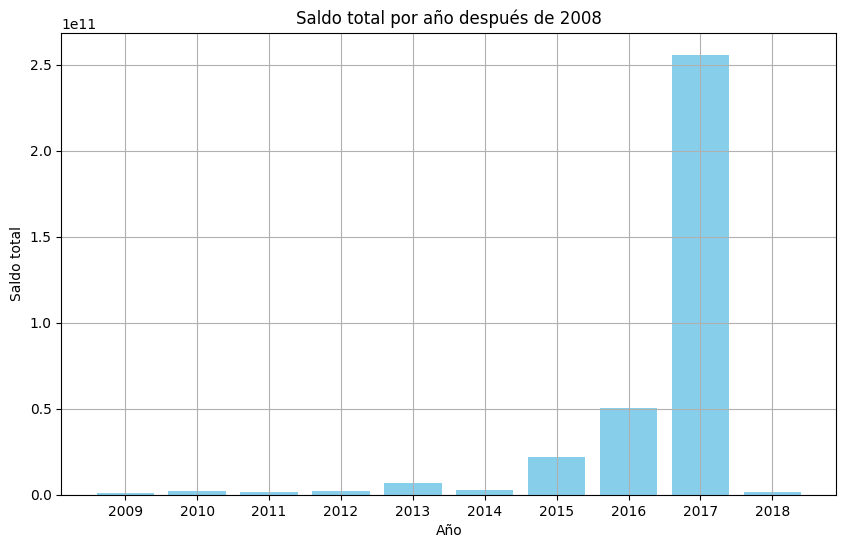

In [119]:
graficar_saldos()

In [125]:

def grafica_salosTiempo():

    # Conectar a la base de datos MySQL
    conn = mysql.connector.connect(user="root", password="admin", host="127.0.0.1", database="Clinica")
    cursor = conn.cursor()

    # Consulta SQL para seleccionar los saldos y fechas después de 2008
    query = """
        SELECT Fecha, SALDO 
        FROM Inventario 
        WHERE YEAR(Fecha) > 2008 
        ORDER BY Fecha ASC
    """

    # Ejecutar la consulta
    cursor.execute(query)

    # Obtener los resultados de la consulta
    resultados = cursor.fetchall()

    # Cerrar la conexión
    conn.close()

    # Preparar los datos para la gráfica
    fechas = [resultado[0] for resultado in resultados]
    saldos = [resultado[1] for resultado in resultados]

    # Crear la gráfica de barras
    plt.figure(figsize=(10, 6))
    plt.plot(fechas, saldos, color='skyblue')

    # Personalizar la gráfica
    plt.xlabel('Fecha')
    plt.ylabel('Saldo')
    plt.title('Saldos respecto al tiempo después de 2008')
    plt.xticks(rotation=45)
    plt.grid(True)

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()


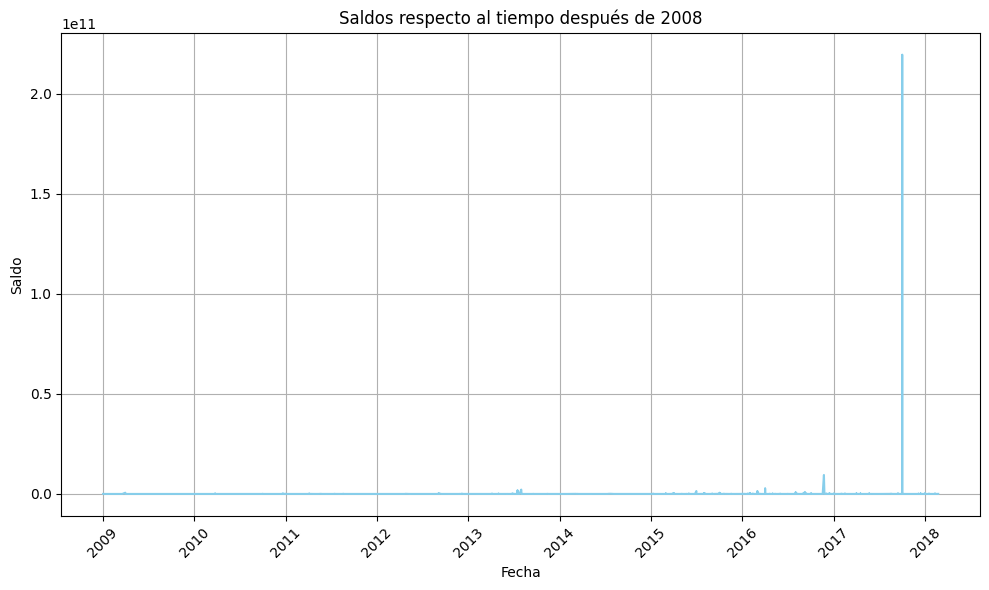

In [126]:
grafica_salosTiempo()

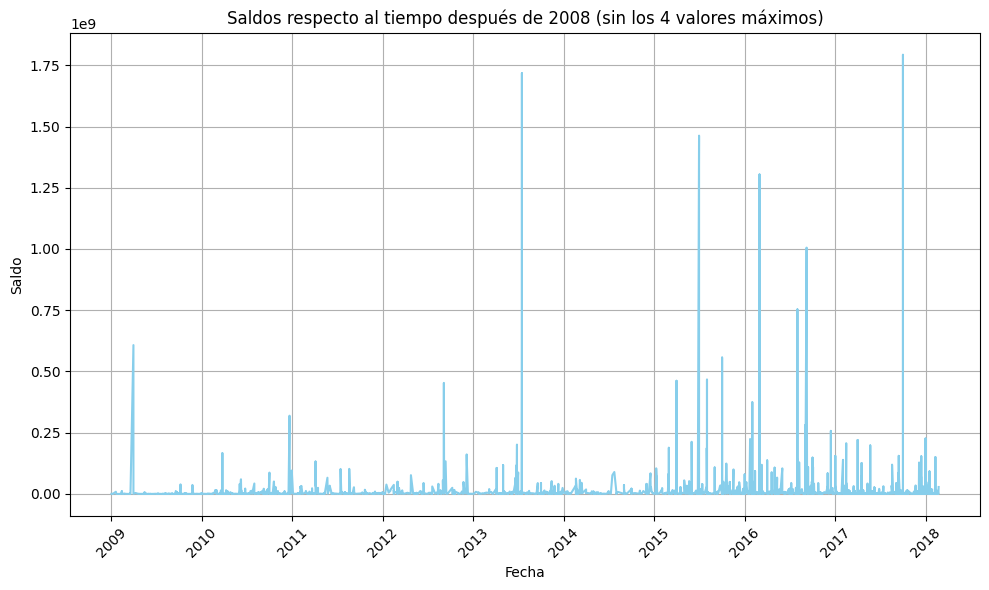

In [130]:
def grafica_saldos_tiempo2():
    # Conectar a la base de datos MySQL
    conn = mysql.connector.connect(user="root", password="admin", host="127.0.0.1", database="Clinica")
    cursor = conn.cursor()

    # Consulta SQL para seleccionar los saldos y fechas después de 2008
    query = """
        SELECT Fecha, SALDO 
        FROM Inventario 
        WHERE YEAR(Fecha) > 2008 
        ORDER BY Fecha ASC
    """

    # Ejecutar la consulta
    cursor.execute(query)

    # Obtener los resultados de la consulta
    resultados = cursor.fetchall()

    # Cerrar la conexión
    conn.close()

    # Calcular los cuatro valores máximos
    maximos = sorted(resultados, key=lambda x: x[1], reverse=True)[:4]

    # Filtrar los resultados excluyendo los cuatro valores máximos
    resultados_filtrados = [resultado for resultado in resultados if resultado not in maximos]

    # Preparar los datos para la gráfica
    fechas = [resultado[0] for resultado in resultados_filtrados]
    saldos = [resultado[1] for resultado in resultados_filtrados]

    # Crear la gráfica de línea
    plt.figure(figsize=(10, 6))
    plt.plot(fechas, saldos, color='skyblue')

    # Personalizar la gráfica
    plt.xlabel('Fecha')
    plt.ylabel('Saldo')
    plt.title('Saldos respecto al tiempo después de 2008 (sin los 4 valores máximos)')
    plt.xticks(rotation=45)
    plt.grid(True)

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

# Llamar a la función para generar la gráfica
grafica_saldos_tiempo2()

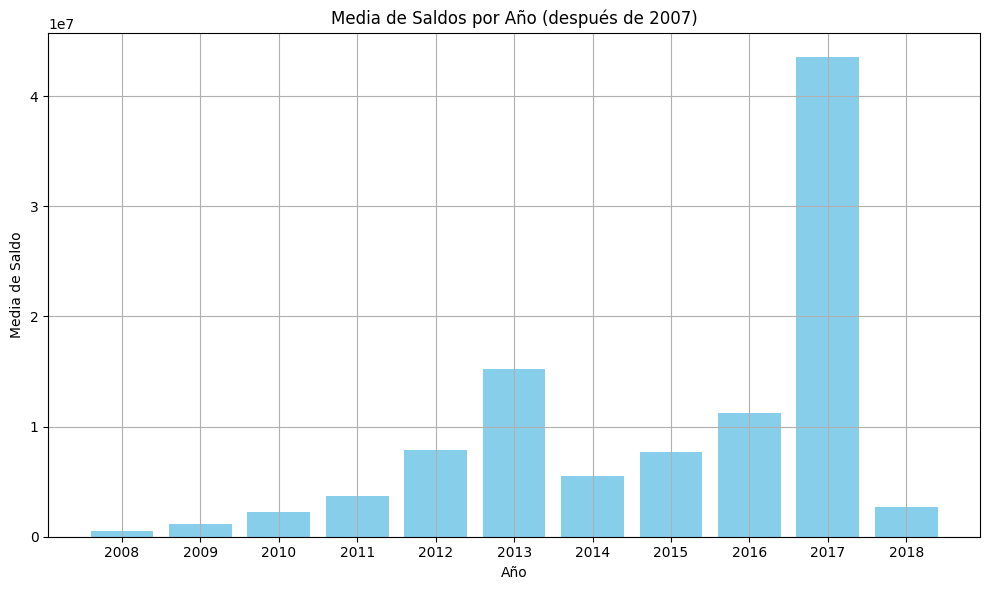

In [134]:
def grafica_media_saldos_por_anio():
    # Conectar a la base de datos MySQL
    conn = mysql.connector.connect(user="root", password="admin", host="127.0.0.1", database="Clinica")
    cursor = conn.cursor()

    # Consulta SQL para obtener la media de los saldos por año después de 2007
    query = """
        SELECT YEAR(Fecha) AS Año, AVG(SALDO) AS Media_Saldo
        FROM Inventario 
        WHERE YEAR(Fecha) > 2007
        GROUP BY YEAR(Fecha)
    """

    # Ejecutar la consulta
    cursor.execute(query)

    # Obtener los resultados de la consulta
    resultados = cursor.fetchall()

    # Cerrar la conexión
    conn.close()

    # Preparar los datos para la gráfica
    anios = [resultado[0] for resultado in resultados]
    medias_saldo = [resultado[1] for resultado in resultados]

    # Crear la gráfica de barras
    plt.figure(figsize=(10, 6))
    plt.bar(anios, medias_saldo, color='skyblue')

    # Personalizar la gráfica
    plt.xlabel('Año')
    plt.ylabel('Media de Saldo')
    plt.title('Media de Saldos por Año (después de 2007)')
    plt.xticks(anios)
    plt.grid(True)

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

# Llamar a la función para generar la gráfica
grafica_media_saldos_por_anio()



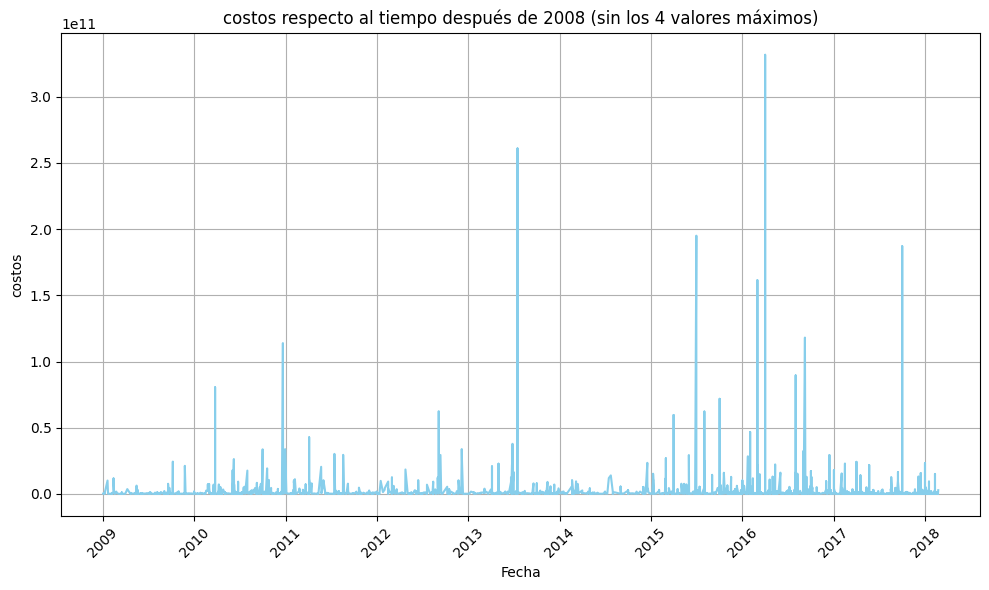

In [135]:
def grafica_saldos_tiempo2():
    # Conectar a la base de datos MySQL
    conn = mysql.connector.connect(user="root", password="admin", host="127.0.0.1", database="Clinica")
    cursor = conn.cursor()

    # Consulta SQL para seleccionar los saldos y fechas después de 2008
    query = """
        SELECT Fecha, Costo 
        FROM Inventario 
        WHERE YEAR(Fecha) > 2008 
        ORDER BY Fecha ASC
    """

    # Ejecutar la consulta
    cursor.execute(query)

    # Obtener los resultados de la consulta
    resultados = cursor.fetchall()

    # Cerrar la conexión
    conn.close()

    # Calcular los cuatro valores máximos
    maximos = sorted(resultados, key=lambda x: x[1], reverse=True)[:4]

    # Filtrar los resultados excluyendo los cuatro valores máximos
    resultados_filtrados = [resultado for resultado in resultados if resultado not in maximos]

    # Preparar los datos para la gráfica
    fechas = [resultado[0] for resultado in resultados_filtrados]
    costos = [resultado[1] for resultado in resultados_filtrados]

    # Crear la gráfica de línea
    plt.figure(figsize=(10, 6))
    plt.plot(fechas, costos, color='skyblue')

    # Personalizar la gráfica
    plt.xlabel('Fecha')
    plt.ylabel('costos')
    plt.title('costos respecto al tiempo después de 2008 (sin los 4 valores máximos)')
    plt.xticks(rotation=45)
    plt.grid(True)

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

# Llamar a la función para generar la gráfica
grafica_saldos_tiempo2()

In [137]:
lista = [('123', 123, 'Prueba', 'Activo', '2024-04-10 15:30:00', 200, 100, 50, 'prueba2')]

In [152]:
def insertarProducto(lista):
    conn= mysql.connector.connect(user="root", password="admin",host="127.0.0.1", database="Clinica")
    cursor= conn.cursor()
    # Consulta para insertar los datos en la tabla 'Inventario' con los valores de SALDO y Costo convertidos a cadenas
    query = """
        INSERT INTO Inventario (Activo, Serial, Descripcion, ESTADO, Fecha, Costo, SALDO, `C.COSTO`, `Desc.C.Costo`)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    cursor.executemany(query, lista)
    conn.commit()
    conn.close()

In [214]:

conn = mysql.connector.connect(user="root", password="admin", host="127.0.0.1", database="Clinica")
cursor = conn.cursor()

# Consulta SQL para buscar por serial
query = "SELECT * FROM Inventario WHERE Serial = 123"

# Ejecutar la consulta con el serial proporcionado
cursor.execute(query)

# Obtener los resultados de la consulta
resultado = cursor.fetchall()

# Cerrar la conexión
conn.close()

print(resultado)

[]


In [203]:
conn = mysql.connector.connect(user="root", password="admin", host="127.0.0.1", database="Clinica")
cursor = conn.cursor()

# Consulta SQL para buscar por serial
query = "DELETE  FROM Inventario WHERE Serial = 123"

# Ejecutar la consulta con el serial proporcionado
cursor.execute(query)
conn.commit()

# Cerrar la conexión
conn.close()


In [204]:
import tkinter as tk
from tkinter import simpledialog, messagebox
from datetime import datetime

# Función para ingresar los datos
def ingresar_datos():
    # Crear una ventana secundaria para solicitar los datos
    ventana_datos = tk.Toplevel()
    ventana_datos.title("Ingresar Datos")

    # Solicitar al usuario que ingrese los datos
    activo = simpledialog.askstring("Ingresar Datos", "Ingrese el valor de 'Activo':")
    serial = simpledialog.askinteger("Ingresar Datos", "Ingrese el valor de 'Serial':")
    descripcion = simpledialog.askstring("Ingresar Datos", "Ingrese el valor de 'Descripcion':")

    # Crear menú desplegable para el estado
    estado_label = tk.Label(ventana_datos, text="Seleccione el estado:")
    estado_label.pack()
    estado_options = ["Activo", "Pendiente", "Retirado", "Depreciado"]
    estado_var = tk.StringVar(ventana_datos)
    estado_var.set(estado_options[0])
    estado_menu = tk.OptionMenu(ventana_datos, estado_var, *estado_options)
    estado_menu.pack()

    # Obtener la fecha actual
    fecha = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    costo = simpledialog.askinteger("Ingresar Datos", "Ingrese el valor de 'Costo':")
    saldo = simpledialog.askinteger("Ingresar Datos", "Ingrese el valor de 'Saldo':")
    c_costo = simpledialog.askinteger("Ingresar Datos", "Ingrese el valor de 'C.Costo':")
    desc_ccosto = simpledialog.askstring("Ingresar Datos", "Ingrese el valor de 'Desc.C.Costo':")

    # Función para cerrar la ventana y enviar los datos
    def enviar_datos():
        ventana_datos.destroy()

    # Botón para confirmar y cerrar la ventana
    boton_confirmar = tk.Button(ventana_datos, text="Confirmar", command=enviar_datos)
    boton_confirmar.pack()

    # Mostrar la ventana y esperar hasta que se cierre
    ventana_datos.wait_window()

    # Crear la lista con los datos ingresados por el usuario
    lista = [(activo, serial, descripcion, estado_var.get(), fecha, costo, saldo, c_costo, desc_ccosto)]

    # Mostrar los datos ingresados en un cuadro de diálogo de mensaje
    messagebox.showinfo("Lista Creada", f"Lista creada con los datos ingresados:\n{lista}")

    return lista








In [209]:
lista=ingresar_datos()

In [210]:
insertarProducto(lista)
lista=''